In [8]:
#Ayush Pandhi [1003227457] [University of Toronto]
#Chloe Cheng [1003254818] [University of Toronto]

#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
import scipy.special

#Defining plot rc parameters for font and ticks
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')

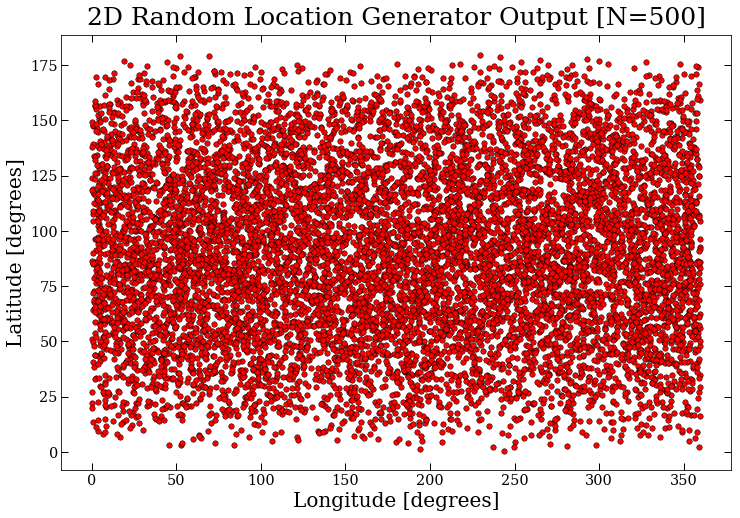

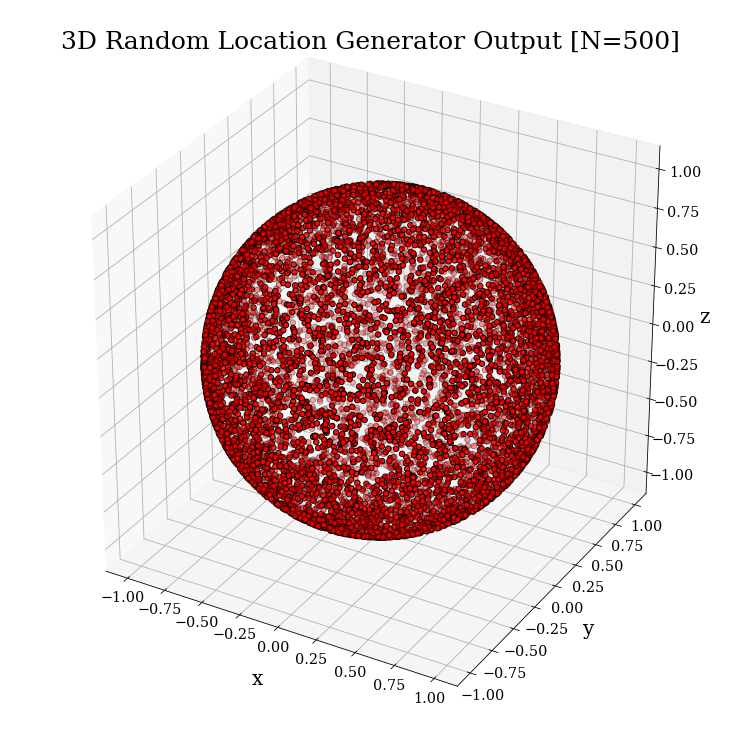

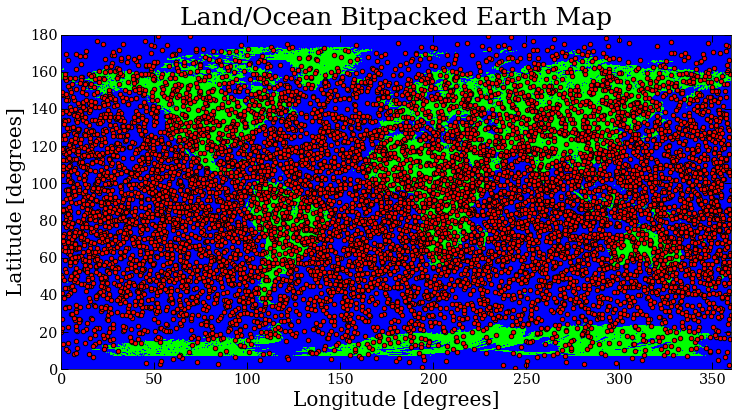

Expected land fraction of Earth: 0.2688036908436214
For 10000 samples, the estimated land fraction is 0.2626 with a percent error of 2.307889011550226


In [2]:
#PROBLEM 1

#PART C
#Random number generation for N points
N = 10000
z1 = np.random.random(N)
z2 = np.random.random(N)

#Generating angles theta and phi
theta = np.arccos(1 - 2*z1)
phi = 2*np.pi*z2

#Getting cartesian coordinates from theta, phi and radius of 1
x = np.sin(theta)*np.cos(phi)
y = np.sin(theta)*np.sin(phi)
z = np.cos(theta)

#Plotting the points in a 2D Longitude vs. Latitude map
plt.figure(figsize=(12,8))
plt.scatter(phi*(180/np.pi), theta*(180/np.pi), marker='o', color='r', linewidth=0.5, edgecolor='k', s=30)
plt.title('2D Random Location Generator Output [N=500]', fontsize=25, y=1.01)
plt.xlabel('Longitude [degrees]', fontsize=20)
plt.ylabel('Latitude [degrees]', fontsize=20)
plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
plt.savefig('lab10_q1_plot1.pdf', bbox_inches='tight')
plt.show()

#Plotting the points in a 3D cartesian grid
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(xs=x, ys=y, zs=z, marker='o', color='r', linewidth=1, edgecolor='k', s=30)
ax.set_title('3D Random Location Generator Output [N=500]', fontsize=25, y=1.02)
ax.set_xlabel('x', fontsize=20, labelpad=15)
ax.set_ylabel('y', fontsize=20, labelpad=15)
ax.set_zlabel('z', fontsize=20, labelpad=15)
ax.tick_params(axis='x', which='major', pad=1)
ax.tick_params(axis='y', which='major', pad=5)
ax.tick_params(axis='z', which='major', pad=10)
plt.savefig('lab10_q1_plot2.pdf', bbox_inches='tight')
plt.show()

#PART D
#Loading Earth.npy dataset
data = np.unpackbits(np.load('Earth.npy')).reshape(2160, 4320)

#Diagnostic plot of Earth.npy dataset overplotted with our randomly generated locations
plt.figure(figsize=(12,10))
plt.imshow(data, extent=[0, 360, 0, 180], vmin=0, vmax=1, cmap='brg')
plt.scatter(phi*(180/np.pi), theta*(180/np.pi), marker='o', color='red', edgecolor='k', linewidth=1, s=20)
plt.title('Land/Ocean Bitpacked Earth Map', fontsize=25, y=1.01)
plt.xlabel('Longitude [degrees]', fontsize=20)
plt.ylabel('Latitude [degrees]', fontsize=20)
plt.xlim(0, 360)
plt.ylim(0, 180)
plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
plt.savefig('lab10_q1_plot3.pdf', bbox_inches='tight')
plt.show()

#Computing land fraction
landfrac1 = np.sum(data)/(data.shape[0]*data.shape[1])
print('Expected land fraction of Earth:', landfrac1)

#PART E
#Setting the initial count of land and ocean results to 0
land = 0
water = 0

#Computing the land fraction using Monte Carlo methods
for i in range(N):
    lat = int(theta[i]*12*(180/np.pi))
    long = int(phi[i]*12*(180/np.pi))
    if data[lat,long] == 1:
        land += 1
    if data[lat,long] == 0:
        water += 1

#Printing the number of samples and land fraction estimate
landfrac2 = land/(land+water)
print('For', N, 'samples, the estimated land fraction is', landfrac2, 'with a percent error of', np.abs(landfrac1 - landfrac2)/landfrac1*100)

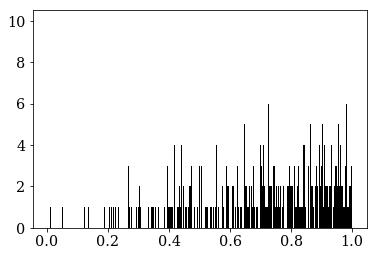

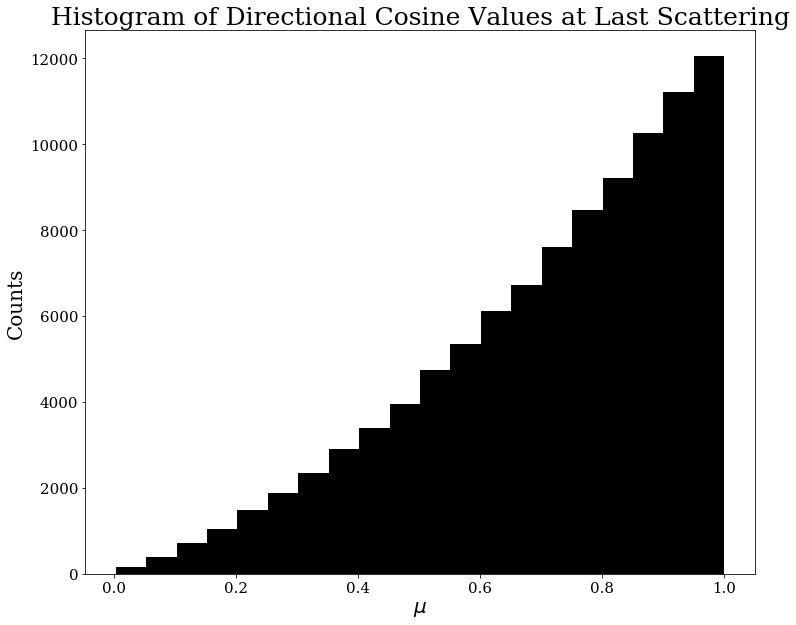

The limb-darkening coefficients obtained from the fit are  2.535426214563864  and  -0.16629176198011167 .


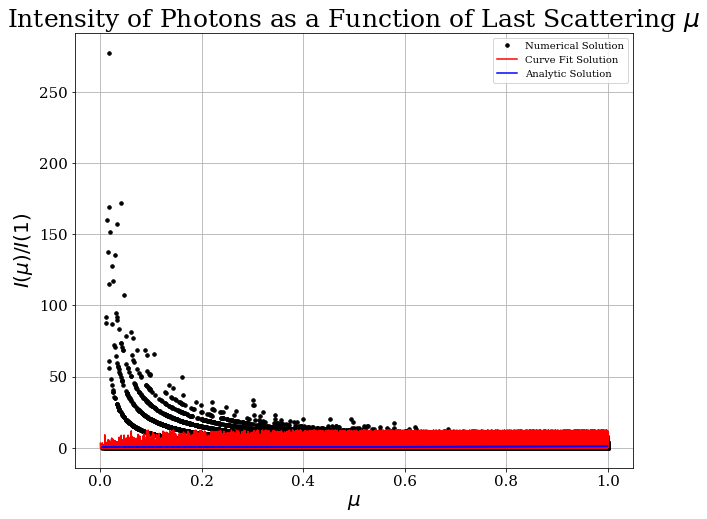

In [5]:
#PROBLEM 2

#PART A
#Functions defined in lab manual
def get_tau_step():
    """calculate how far a photon travels before it gets scattered.
    Input: tau - optical depth of the atmosphere
    Output: optical depth travelled"""
    delta_tau = -np.log(np.random.random())
    return delta_tau

def emit_photon(tau_max):
    """Emit a photon from the stellar core.
    Input: tau max - max optiacl depth
    Output:
        tau: optical depth at which the photon is created
        mu: directional cosine of the photon emitted"""
    tau = tau_max
    delta_tau = get_tau_step()
    mu = np.random.random()
    return tau-delta_tau*mu, mu

def scatter_photon(tau):
    """Scatter a photon.
    Input: tau - optical depth of the atmosphere
    Output:
        tau: new optical depth
        mu: directional cosine of the photon scattered"""
    delta_tau = get_tau_step()
    #sample mu uniformly from -1 to 1
    mu = 2*np.random.random()-1
    tau = tau + delta_tau * mu
    return tau, mu

#Define function for scattering of photons
def random_walk_1(tau_max):
    tau, mu = emit_photon(tau_max)
    num_scatter = 0
    while tau > 0:# <= tau_max:
        tau, mu = scatter_photon(tau)
        #If the photon scatters back to the core, start again
        num_scatter+=1
        if tau > tau_max:
            tau, mu = emit_photon(tau_max)

    return tau, mu, num_scatter
        
def random_walk(tau_max, N):
    tau = np.zeros(N)
    mu = np.zeros(N)
    num_scatter = np.zeros(N)
    for i in range(N):
        #print(i)
        tau[i], mu[i], num_scatter[i] = random_walk_1(tau_max)
    return tau, mu, num_scatter

#PART B
N = int(1e5) #Number of photons
tau_max = 10
tau_sim, mu_sim, num_scatter_sim = random_walk(tau_max, N)
mu_sim = np.abs(mu_sim)

#Get the counts N(mu)
x, bins, p = plt.hist(mu_sim, bins=N, color='k')

#Plot a histogram of the results
plt.figure(figsize=(12,10))
plt.hist(mu_sim, bins=20, color='k')
plt.title('Histogram of Directional Cosine Values at Last Scattering', fontsize=25)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('lab10_q2_plot1.pdf', bbox_inches='tight')
plt.show()

#Function for numeric solution of I
def I_numeric(Nmu, mu):
    return Nmu/mu

#Function for analytic solution of I, where I1 = 1 
def I_analytic(I1, mu):
    return I1*(0.4 + 0.6*mu)

#Linear model function for curve-fit
def model_func(x, a, b):
    return a*x + b

#Calculate I(mu) numerically 
I_num = I_numeric(x, mu_sim)

#Calculate I(mu) analytically
I_ana = I_analytic(1, mu_sim)

#Only fit values of I where it behaves linearly (i.e. cut out weird exponential stuff at beginning)
I_num_small = []
for i in range(len(I_num)):
    if I_num[i] < 5:
        I_num_small.append(I_num[i])
I_num_small = np.array(I_num_small)

#Create array of mu-values to use in fitting
mu_array = np.arange(0,1,1/len(I_num_small))

#Compute best-fit line and obtain limb-darkening coefficients from it
popt, pcov = curve_fit(model_func, mu_array, I_num_small, p0=(1,0))
print('The limb-darkening coefficients obtained from the fit are ', popt[0], ' and ', popt[1], '.')

#Plot numeric, analytic, and best fit 
plt.figure(figsize=(10,8))
plt.plot(mu_sim, I_num, linestyle='None', marker='.', markersize=7, label='Numerical Solution', color='k')
plt.plot(mu_array, model_func(I_num_small, *popt), color='r', label='Curve Fit Solution')
plt.plot(mu_sim, I_ana, label='Analytic Solution', color='b')
plt.title('Intensity of Photons as a Function of Last Scattering $\mu$', fontsize=25)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$I(\mu)/I(1)$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.grid()
plt.savefig('lab10_q2_plot2.pdf', bbox_inches='tight')
plt.show()

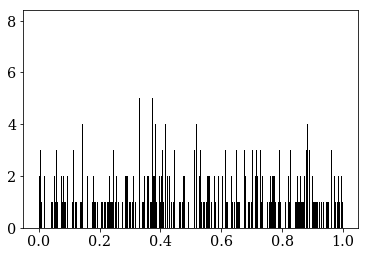

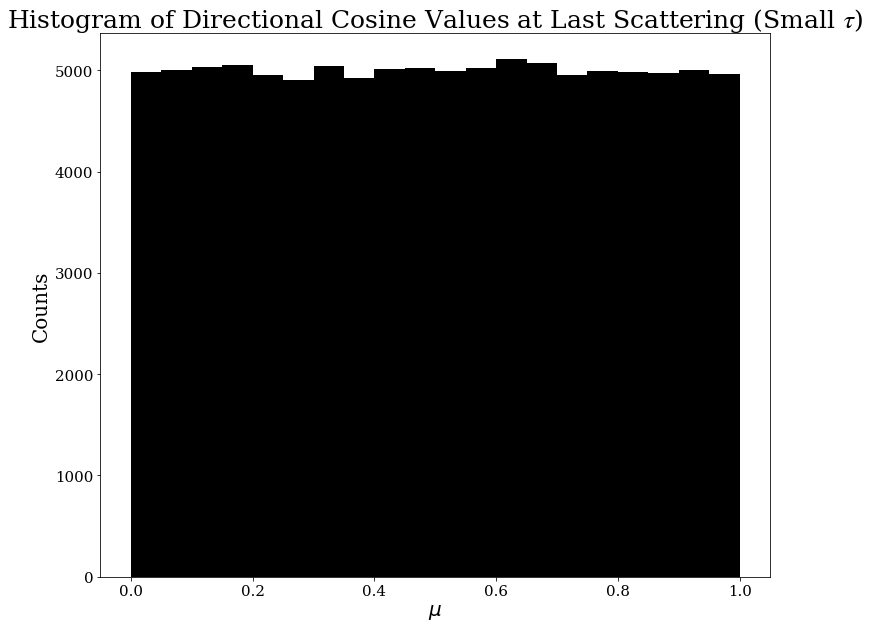

The limb-darkening coefficients obtained from the fit are  0.3706920660066909  and  6.225195760833475 .


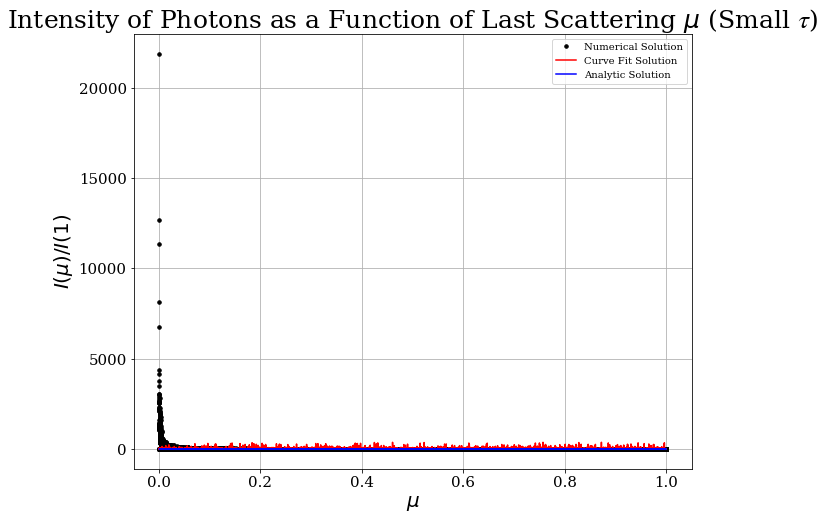

In [6]:
#PROBLEM 2 PART C
#Define small tau_max
tau_max_c = 0.0001

#Calculate tau, mu, number of scattering events
tau_sim_c, mu_sim_c, num_scatter_sim_c = random_walk(tau_max_c, N)
mu_sim_c = np.abs(mu_sim_c)

#Get the counts N(mu)
x_c, bins_c, p_c = plt.hist(mu_sim_c, bins=N, color='k')

#Plot a histogram of the results
plt.figure(figsize=(12,10))
plt.hist(mu_sim_c, bins=20, color='k')
plt.title('Histogram of Directional Cosine Values at Last Scattering (Small $𝜏$)', fontsize=25)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('lab10_q2_plot3.pdf', bbox_inches='tight')
plt.show()

#Calculate I(mu) numerically 
I_num_c = I_numeric(x_c, mu_sim_c)

#Only fit values of I where it behaves linearly (i.e. cut out weird exponential stuff at beginning)
I_num_small_c = []
for i in range(len(I_num_c)):
    if I_num_c[i] < 1000:
        I_num_small_c.append(I_num_c[i])
I_num_small_c = np.array(I_num_small_c)

#Create array of mu-values to use in fitting
mu_array_c = np.arange(0,1,1/len(I_num_small_c))

#Compute best-fit line and obtain limb-darkening coefficients from it
popt_c, pcov_c = curve_fit(model_func, mu_array_c, I_num_small_c, p0=(1,0))
print('The limb-darkening coefficients obtained from the fit are ', popt_c[0], ' and ', popt_c[1], '.')

#Plot numeric, analytic, and best fit 
plt.figure(figsize=(10,8))
plt.plot(mu_sim_c, I_num_c, linestyle='None', marker='.', markersize=7, label='Numerical Solution', color='k')
plt.plot(mu_array_c, model_func(I_num_small_c, *popt_c), color='r', label='Curve Fit Solution')
plt.plot(mu_sim_c, I_analytic(1, mu_sim_c), label='Analytic Solution', color='b')
plt.title('Intensity of Photons as a Function of Last Scattering $\mu$ (Small $𝜏$)', fontsize=25)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$I(\mu)/I(1)$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.grid()
plt.savefig('lab10_q2_plot4.pdf', bbox_inches='tight')
plt.show()

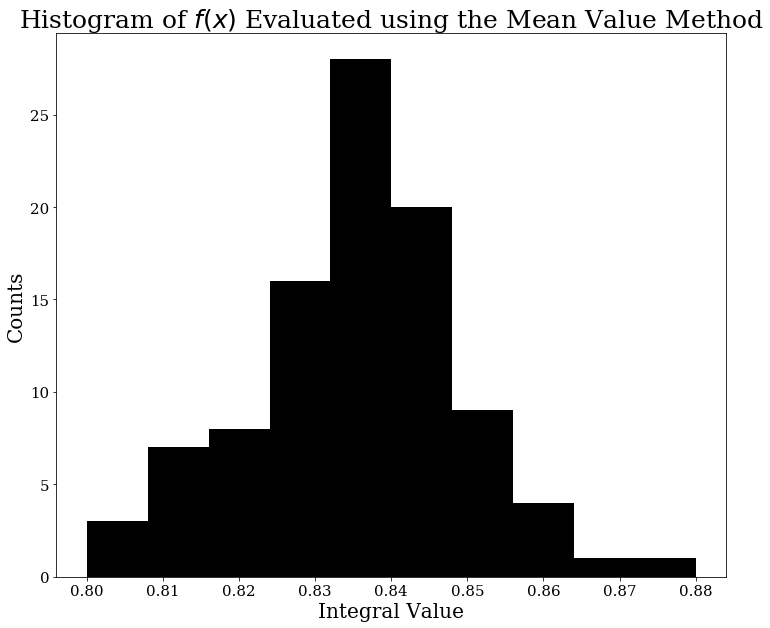

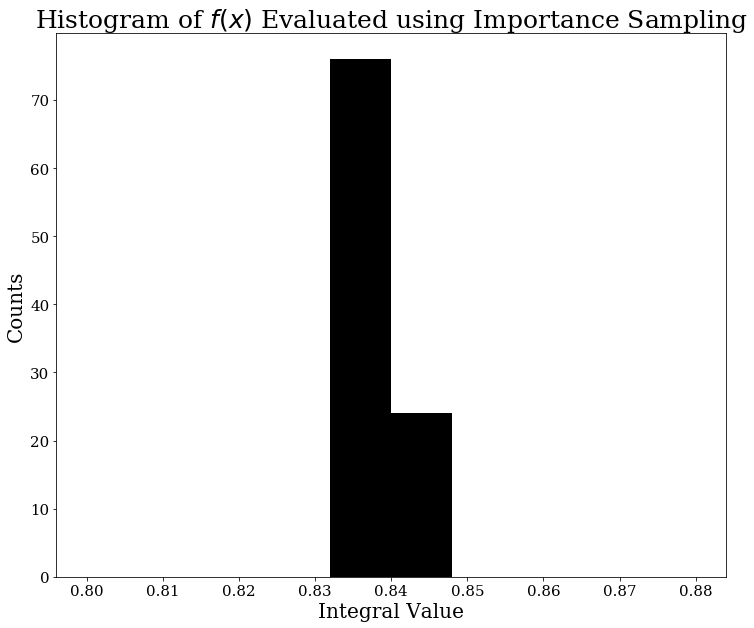

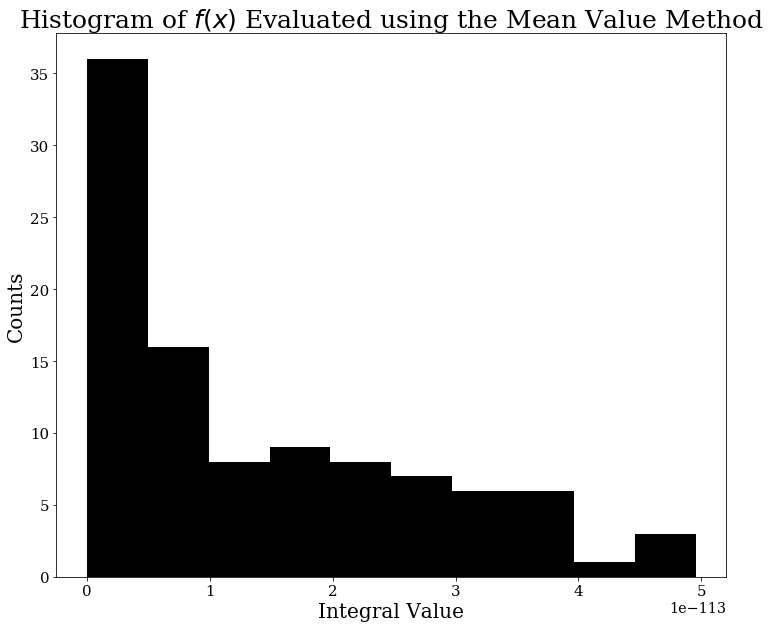

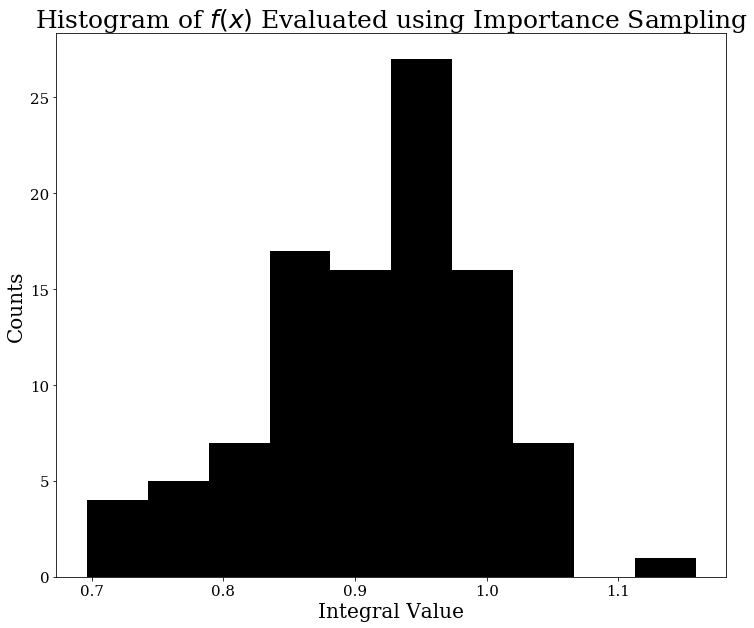

In [9]:
#PROBLEM 3

#PART A
#Define function for the mean value method
def mean_value(a, b, N, f):
    I = ((b - a)/N)*np.sum(f)
    return I

#Define function for importance sampling
def importance_sampling(N, f, w, w_int):
    I = (1/N)*np.sum(f/w)*w_int
    return I

#Define weight function for importance sampling
def w(x):
    return x**(-0.5)

#Define function for the integrand of the integral we want to evaluate
def f(x):
    return (x**(-0.5))/(1 + np.exp(x))

#Define constants
N = 10000
a = 0
b = 1 

#Calculate the value of the integral using the mean value method
I_mean = np.zeros(100)
x_mean = np.zeros((100, N))
for i in range(len(I_mean)):
    x_mean[i] = np.random.random(N)
    I_mean[i] = mean_value(a, b, N, f(x_mean[i]))
    
#Calculate the value of the integral using importance sampling
I_importance = np.zeros(100)
z_importance = np.zeros((100, N))
w_int = 2
for i in range(len(I_importance)):
    z_importance[i] = np.random.random(N)
    x_importance = z_importance**2
    I_importance[i] = importance_sampling(N, f(x_importance[i]), w(x_importance[i]), w_int)
    
#Plot a histogram of the values of the solution found using mean value method
plt.figure(figsize=(12,10))
plt.hist(I_mean, 10, range=[0.8, 0.88], color='k')
plt.title('Histogram of $f(x)$ Evaluated using the Mean Value Method', fontsize=25)
plt.xlabel('Integral Value', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('lab10_q3_plot1.pdf', bbox_inches='tight')
plt.show()

#Plot a histogram of the values of the solution found using importance sampling
plt.figure(figsize=(12,10))
plt.hist(I_importance, 10, range=[0.8, 0.88], color='k')
plt.title('Histogram of $f(x)$ Evaluated using Importance Sampling', fontsize=25)
plt.xlabel('Integral Value', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('lab10_q3_plot2.pdf', bbox_inches='tight')
plt.show()

#PART B
#Define function for the integrand of the integral we want to evaluate
def f2(x):
    return (np.cos(10*(x - 5))**2)*np.exp(-(x - 5)**4)

#Define weight function
def w2(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-((x - 5)**2)/2)

#Define constants
N2 = 100
a2 = 0
b2 = 10

#Calculate the value of the integral using the mean value method
I2_mean = np.zeros(100)
x2_mean = np.zeros((100, N2))
for i in range(len(I2_mean)):
    x2_mean[i] = np.random.random(N2)
    I2_mean[i] = mean_value(a2, b2, N2, f2(x2_mean[i]))
    
#Calculate the value of the integral using importance sampling
I2_importance = np.zeros(100)
x2_importance = np.zeros((100, N2))
w2_int = scipy.special.erf(5/np.sqrt(2))
for i in range(len(I2_importance)):
    x2_importance[i] = np.random.normal(5, 1, N2)
    I2_importance[i] = importance_sampling(N2, f2(x2_importance[i]), w2(x2_importance[i]), w2_int)
    
#Plot a histogram of the values of the solution found using mean value method
plt.figure(figsize=(12,10))
plt.hist(I2_mean, 10, color='k')
plt.title('Histogram of $f(x)$ Evaluated using the Mean Value Method', fontsize=25)
plt.xlabel('Integral Value', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('lab10_q3_plot3.pdf', bbox_inches='tight')
plt.show()

#Plot a histogram of the values of the solution found using importance sampling
plt.figure(figsize=(12,10))
plt.hist(I2_importance, 10, color='k')
plt.title('Histogram of $f(x)$ Evaluated using Importance Sampling', fontsize=25)
plt.xlabel('Integral Value', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('lab10_q3_plot4.pdf', bbox_inches='tight')
plt.show()